In [201]:
import numpy as np
import math
import cv2
from matplotlib import pyplot as mlt
# comment something to push

(238, 238)


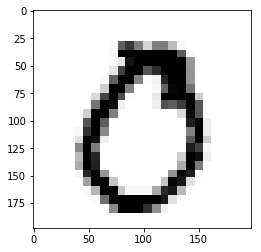

In [292]:
img_path = 'zero.png'
image = cv2.imread(img_path,0)
print(image.shape)
# image = np.reshape(a, (-1, 28)).astype(np.uint8)
image = image[20:218,20:218]
# mlt.imshow(image, cmap='Greys')
mlt.imshow(image, cmap='Greys')

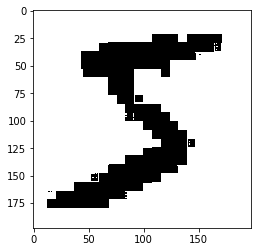

In [280]:
ret,img = cv2.threshold(image,60,255,cv2.THRESH_BINARY)
mlt.imshow(img, cmap = 'Greys')

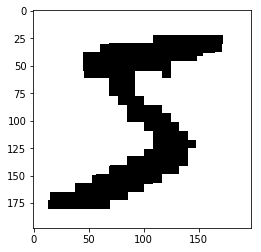

In [281]:
kernel = np.ones((10,10),np.uint8)
# closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
# dilation = cv2.dilate(img,kernel,iterations = 1)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

mlt.imshow(closing,cmap = 'Greys')


In [282]:
img = closing
print((img.shape))

(198, 198)


In [283]:
for i, row in enumerate(img):
    for j, value in enumerate(row):
#         cv2.circle(img,(i,j),5,150,1)
        if value == 255:
            start_point = (i, j)
            print(start_point, value)
            break
    else:
        continue
    break

(23, 109) 255


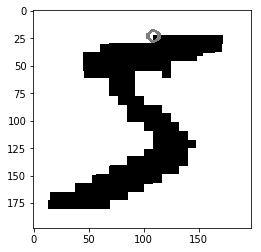

In [208]:
cv2.circle(img,start_point[::-1],5,150,2)
mlt.imshow(img, cmap='Greys')

In [287]:
directions = [ 0,  1,  2,
               7,      3,
               6,  5,  4]
dir2idx = dict(zip(directions, range(len(directions))))
print(dir2idx)
change_j =   [-5,  0, 5, # x or columns
              -5,    5,
              -5,  0, 5]

change_i =   [-5, -5, -5, # y or rows
               0,      0,
               5, 5,5]

border = []
chain = []
curr_point = start_point
for direction in directions:
#     print(direction)
    idx = dir2idx[direction]
    new_point = (start_point[0]+change_i[idx], start_point[1]+change_j[idx])
    if img[new_point] != 0: # if is ROI
        border.append(new_point)
        chain.append(direction)
        curr_point = new_point
        break

count = 0
while curr_point != start_point:
    #figure direction to start search
#     cv2.circle(img,curr_point[::-1],5,150,2)

    b_direction = (direction + 5) % 8
    b_direction += 1
    dirs_1 = range(b_direction, 8)
    dirs_2 = range(0, b_direction)
    dirs = []
    dirs.extend(dirs_1)
    dirs.extend(dirs_2)
#     print('direction', direction)
#     print(dirs)
#     print(dir2idx[7])
    for direction in dirs:
#         print(direction)
        idx = dir2idx[direction]
#         print('idx', idx)
        new_point = (curr_point[0]+change_i[idx], curr_point[1]+change_j[idx])
        if image[new_point] != 0: # if is ROI
            border.append(new_point)
            chain.append(direction)
            curr_point = new_point
            break
#     if count == 1000: break
    count += 1

{0: 0, 1: 1, 2: 2, 7: 3, 3: 4, 6: 5, 5: 6, 4: 7}


In [288]:
print(count)
print(chain)

156
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 7, 6, 4, 6, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5, 7, 7, 1, 0, 6, 7, 6, 4, 3, 5, 5, 5, 4, 3, 3, 3, 4, 3, 5, 4, 3, 5, 5, 4, 5, 5, 6, 5, 5, 7, 6, 5, 7, 7, 7, 6, 6, 7, 7, 6, 7, 7, 6, 4, 7, 1, 0, 6, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 3, 3, 2, 1, 3, 3, 2, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 3, 2, 3, 3, 3, 3, 2, 1, 0, 7, 7, 7, 7, 1, 0, 7, 0, 1, 0, 7, 1, 1, 1, 1, 0, 6, 5, 7, 1, 1, 0, 6, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3]


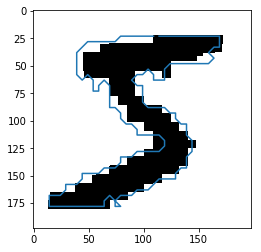

In [289]:
mlt.imshow(img, cmap='Greys')
mlt.plot([i[1] for i in border], [i[0] for i in border])

In [329]:
my_list=["Alex:1990:London", "Tony:1993:NYC", "Kate:2001:Beijing", "Tony:2001:LA", "Alex:1978:Shanghai"]
dict = {}
for idx, content in enumerate(my_list):
    name = content[:(content.index(':'))]
    if name not in dict:
        dict[name] = []
    dict[name].append(my_list[idx])

{'Alex': ['Alex:1990:London', 'Alex:1978:Shanghai'], 'Tony': ['Tony:1993:NYC', 'Tony:2001:LA'], 'Kate': ['Kate:2001:Beijing']}


In [336]:
def properNounCorrection(noun):
    noun = noun.lower()
    a = list(noun)
    a[0]= a[0].upper()
    a = ''.join(a)
    print(a)
properNounCorrection('oNAD')

Onad


In [328]:
temp = {'a':1, 'b':2}
if 'a' in temp:
    print('ok')

ok
